#**CLASSIFICATION : TRUE VS FALSE VS OTHER VS MIXTURE (Première version)**

**Membres:** Hadjoudja Bachir (21811363), Zeggar Rym (21909615), Bendahmane Rania (21811387), Labiad Youcef (21710780).

On a d'abord classé selon les quatre classes , mais vu que les accuracy et autres mesures étaient trop faibles , on a du entamer une autre technique de classification pour ces quatre classes

In [ ]:
import sys
from numpy import vstack
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from tabulate import tabulate
import numpy as np
import time
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay


autorisation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


chemin spécifique Google Drive

In [ ]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive
%ls

%pwd

/content/gdrive/My Drive/Colab Notebooks
 bonFakeNEWS4.ipynb
'BON_TRUE FALSE_vs_OTHER_entités_nommées.ipynb'
'Copie de FakeNEWS.ipynb'
'Copie de True_False_Other_Mixture.ipynb'
'Copie de TRUE FALSE_vs_OTHER_entités_nommées.ipynb'
'Copie de  Vrai_Faux._entites_marche_bien.ipynb'
 FakeNewsLastVersion.ipynb
 ml_entiteesNommeesTest.ipynb
'Traitement sémantique'/
 True_False_Other_Mixture_final.ipynb
 Untitled0.ipynb
 version2ml_entiteesNommeesTest.ipynb
'VRAI FAUX OTHER MIXTURE_avec_entites_nommees.ipynb'


'/content/gdrive/My Drive/Colab Notebooks'

La fonction qui sera utilisée pour les prétraitements: MyCleanText 
* Mettre le texte en minuscule
* Se débarasser des stopwords
* Se débarasser des nombres
* Stemmatisation
* Lemmatisation ..

La fonction MyshowAllScores prend le y_test et le y_predict, affiche l'accuracy et le classification report avec la matrice de confusion.

In [ ]:
#...................................................Fonction MyCleanText .............................................................................
# mettre en minuscule
#enlever les stopwords
#se debarasser des nombres
#stemmatisation
#lemmatisation 
#......................................................................................................................................................


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#liste des stopwords en anglais
stop_words = set(stopwords.words('english')) 

def MyCleanText(X,
                lowercase=False, #mettre en minuscule
                removestopwords=False, #supprimer les stopwords
                removedigit=False, #supprimer les nombres
                getstemmer=False, #conserver la racine des termes
                getlemmatisation=False #lemmatisation des termes
                ):
  #conversion du texte d'entrée en chaîne de caractères
    sentence=str(X)
    #suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]

    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
  
    return sentence

def MyshowAllScores(y_test,y_pred):
  classes= np.unique(y_test)
  print("Accuracy : %0.3f"%(accuracy_score(y_test,y_pred)))
  print("Classification Report")
  print(classification_report(y_test,y_pred,digits=5))    
  cnf_matrix = confusion_matrix(y_test,y_pred)
  disp=ConfusionMatrixDisplay(cnf_matrix,display_labels=classes)
  disp.plot()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


La classe TextNormalizer qui contiendra la fonction MyCleanText.

Fit_transform de mon corpus propre.

In [ ]:
#..................................................Etape 1 : prétraitement du texte ...................................................................................................
#...................................................Class TextNormalizer  .............................................................................
#fit_transform de mon corpus propre 
#......................................................................................................................................................

from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres  
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False # lemmatisation des termes  
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    


##**Etape 1 : Préparer les données**
* Load et preparer les données à partir des 2 fichiers csv

In [ ]:
dftrain1 = pd.read_csv("/content/gdrive/MyDrive/projet_ML/newsTrain2.csv", names=['id','text','title','rating'], header=0,sep=',', encoding='utf8')
dftrain1.reset_index(drop = True, inplace = True)

dftrain2 = pd.read_csv("/content/gdrive/MyDrive/projet_ML/newsTrain - newsTrain.csv", names=['id','text','title','rating'], header=0,sep=',', encoding='utf8')
dftrain2.reset_index(drop = True, inplace = True)


# concaténer les deux dataframes en ajoutant les lignes du deuxième à la fin du premier
dftrain = pd.concat([dftrain1, dftrain2], ignore_index=True)


print("Echantillon de mon dataset \n")
print(dftrain.sample(n=10))
print("\n")
print("Quelques informations importantes \n")
dftrain.info()
print("\n")
X_text=dftrain["text"]
X_title=dftrain["title"]


print("le texte est")
display(X_text)
print("\n")
print("le titre est")
display(X_title)
print("\n")
y=dftrain.iloc[0:,-1]
print("voici la dernière case de rating")
display(y)
print("\n")
print("la taille de X_text est",X_text.shape)
print("\n")
print("la taille de y_train est " ,y.shape)
print("\n")
y = y.str.lower()
print("Les valeurs de true et false sont:\n", y.value_counts())


Echantillon de mon dataset 

            id                                               text  \
398   5978dc76  Hi, my name is Scott C. Waring and I wrote a f...   
487   9ba64668  Murderers of Stephen Lawrence and Garry Newlov...   
1132  45d2e875  Tens of thousands of workers will share in a £...   
1266  c3dea290  Home Alone 2: Lost in New York is full of viol...   
941   9f10a8a9  It was an accurate and judicious answer, so na...   
1474  d46e2ede  Share Messenger Tweet Email Whatsapp reddit  A...   
649   c4f8a375  I have just been to Buckingham Palace, where H...   
442   972048cd  Snowflake students at Oxford University are th...   
2445  4ebbbb28  Global warming skeptics sometimes say rising t...   
2304  69e7cad4  GEORGIA BECOMES FIRST STATE TO BAN MUSLIM CULT...   

                                                  title   rating  
398   UFO SIGHTINGS DAILY: Thousands witness UFO Ove...    FALSE  
487   Climate Change Wackos Exposed in California Court  mixture  
1132  Work

0       Distracted driving causes more deaths in Canad...
1       Missouri politicians have made statements afte...
2       Home Alone 2: Lost in New York is full of viol...
3       But things took a turn for the worse when riot...
4       It’s no secret that Epstein and Schiff share a...
                              ...                        
2523    More than four million calls to the taxman are...
2524    More under-18s are being taken to court for se...
2525    The Government’s much vaunted Help to Buy Isa ...
2526    The late Robin Williams once called cocaine “G...
2527    The late Robin Williams once called cocaine “G...
Name: text, Length: 2528, dtype: object



le titre est


0       You Can Be Fined $1,500 If Your Passenger Is U...
1           Missouri lawmakers condemn Las Vegas shooting
2       CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...
3       Obama’s Daughters Caught on Camera Burning US ...
4       Leaked Visitor Logs Reveal Schiff’s 78 Visits ...
                              ...                        
2523    Taxman fails to answer four million calls a ye...
2524    Police catch 11‑year‑olds being used to sell d...
2525    Help to Buy Isa scandal: 500,000 first-time bu...
2526             A coke-snorting generation of hypocrites
2527             A coke-snorting generation of hypocrites
Name: title, Length: 2528, dtype: object



voici la dernière case de rating


0         FALSE
1       mixture
2       mixture
3         FALSE
4         FALSE
         ...   
2523       TRUE
2524       TRUE
2525      FALSE
2526       TRUE
2527       TRUE
Name: rating, Length: 2528, dtype: object



la taille de X_text est (2528,)


la taille de y_train est  (2528,)


Les valeurs de true et false sont:
 false      1156
mixture     716
true        422
other       234
Name: rating, dtype: int64


Le jeu de données étant déséquilibré, on a pensé à appliquer le downsampling pour équilibrer nos données. on séléctionne des lignes aléatoirement de TRUE ,FALSE, OTHER et MIXTURE de telle sorte que le nombre de lignes de chacune soit = au nbr de lignes de celle avec le plus petit nbr de lignes. et on mélange le DataFrame.

In [ ]:
# Compter le nombre d'observations dans chaque catégorie
false_count = dftrain['rating'].value_counts()['FALSE']
mixture_count = dftrain['rating'].value_counts()['mixture']
true_count = dftrain['rating'].value_counts()['TRUE']
other_count = dftrain['rating'].value_counts()['other']

# Trouver le nombre minimum d'observations parmi les catégories
min_count = min(false_count, mixture_count, true_count, other_count)

# Sous-échantillonner les catégories pour équilibrer les quantités
false_sampled = dftrain[dftrain['rating'] == 'FALSE'].sample(min_count, random_state=42)
mixture_sampled = dftrain[dftrain['rating'] == 'mixture'].sample(min_count, random_state=42)
true_sampled = dftrain[dftrain['rating'] == 'TRUE'].sample(min_count, random_state=42)
other_sampled = dftrain[dftrain['rating'] == 'other'].sample(min_count, random_state=42)
print(false_sampled.shape)
print(true_sampled.shape)

# Concaténer les échantillons pour obtenir un nouveau dataframe équilibré
dftrain = pd.concat([false_sampled, mixture_sampled, true_sampled, other_sampled])

# Mélanger aléatoirement les données
dftrain = dftrain.sample(frac=1, random_state=42)
print(dftrain)
X_text=dftrain["text"]
X_title=dftrain["title"]
y=dftrain.iloc[0:,-1]
print("la taille de X_text est",X_text.shape)
print("\n")
print("la taille de X_title est",X_title.shape)
print("\n")
print("la taille de y_train est " ,y.shape)
print("\n")
print("les valeurs de TRUE et FALSE maintenant sont " ,y.value_counts())

(234, 4)
(234, 4)
            id                                               text  \
2504  c9a710dc  Hillary Clinton's plane passes over Manhattan ...   
261   a7b20877  Rashida Tlaib is busy at work during a nationa...   
46    fb721890  Natural News The oldest magazine in the United...   
1546  ed8a09ac  Ministers are undermining trust in foreign aid...   
1781  f454e71d  Today the Education Policy Institute's Indepen...   
...        ...                                                ...   
1543  3886ead8  The bombshell claim comes from over 20 hours o...   
422   da3319cc  This is a rush transcript from Fox News Sunday...   
1102  7b9e930d  The use of cocaine in Britain has doubled in s...   
2382  48026a71  A ndy Murray served up an ace to John Inverdal...   
1325  31d33510  Though the whole world relies on RT-PCR to “di...   

                                                  title   rating  
2504  Hillary Clinton Boards The Climate Crisis Trai...  mixture  
261   Tlaib Files L

On divise notre grand X en jeu de données d'apprentissage et de test (20% de test).

In [ ]:

X=dftrain.iloc[0:, 1:3]
print(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is",X_train)
print("y_train is",y_train)
print("X_test is",X_test)
print("y_test is",y_test)


                                                   text  \
2504  Hillary Clinton's plane passes over Manhattan ...   
261   Rashida Tlaib is busy at work during a nationa...   
46    Natural News The oldest magazine in the United...   
1546  Ministers are undermining trust in foreign aid...   
1781  Today the Education Policy Institute's Indepen...   
...                                                 ...   
1543  The bombshell claim comes from over 20 hours o...   
422   This is a rush transcript from Fox News Sunday...   
1102  The use of cocaine in Britain has doubled in s...   
2382  A ndy Murray served up an ace to John Inverdal...   
1325  Though the whole world relies on RT-PCR to “di...   

                                                  title  
2504  Hillary Clinton Boards The Climate Crisis Trai...  
261   Tlaib Files Lawsuit to Ban the American Flag i...  
46    Still think 5G is harmless? Scientific America...  
1546  Ministers are undermining trust in foreign aid...  
1

##**Etape 2 : Classification selon la colonne TEXT :**



**Ici, c'est une étape importante,** on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 3 meilleurs sont SVM,LR et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:

score = 'accuracy'
seed = 7
allresults = []
results = []
names = []


X_train_text=X_train['text']
X_train_text.reset_index(drop = True, inplace = True)


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]


models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

                        
# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))
    #pipeline.fit(X_train_text,y_train)
all_results=[]
scores=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    
#    print ("Evaluation de ",p)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train_text,y_train, cv=kfold, scoring=score)
    #print("Pour le classifieur",p[0],"on a un score de",cv_results.mean(),"et un écart type de",cv_results.std())
    scores.append(cv_results)
    names.append(p[0])

    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)
    # affichage des résultats
#print ('\nLe meilleur resultat : ',max(results))


Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC())])
all resultats [('SVM', 0.7018198198198198, 0.057179347688885454), ('RF', 0.6884684684684685, 0.03982870554317204), ('LogisticRegression', 0.6804504504504504, 0.058406024484881344), ('CART', 0.6123063063063062

On affiche les accuracy de chaque classifieur, on remarque la médiane (en rouge) de chaque et l'écart type aussi.

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

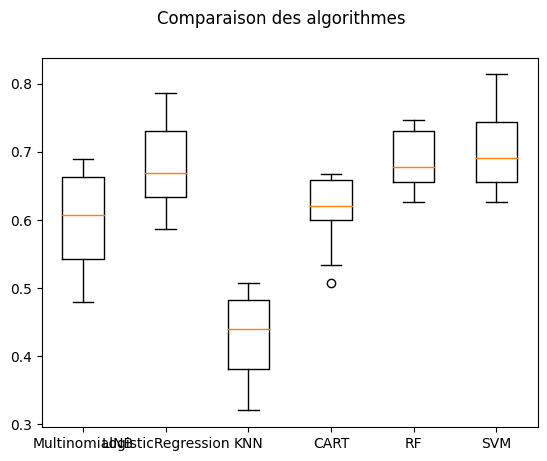

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

### Choisir les meilleurs paramètres et hyperparamètres pour SVM et RF : 



On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

grid search fait
X_train (748, 26615)
y_train (748,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.634 

meilleur estimateur SVC(kernel='linear', random_state=42) 

Accuracy : 0.707
Classification Report
              precision    recall  f1-score   support

       FALSE    0.69444   0.53191   0.60241        47
        TRUE    0.73469   0.66667   0.69903        54
     mixture    0.60465   0.63415   0.61905        41
       other    0.76667   1.00000   0.86792        46

    accuracy                        0.70745       188
   macro avg    0.70011   0.70818   0.69710       188
weighted avg    0.70409   0.70745   0.69876       188

Ensemble des meilleurs paramètres :
	C: 1.0
	gamma: 'scale'
	kernel: 'linear'
grid search fait
X_train (748, 22447)
y_train (748,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.638 

meilleur estimateur SVC(kernel='linear', random_state=42) 

Accuracy : 0.649
Classification Report
              p

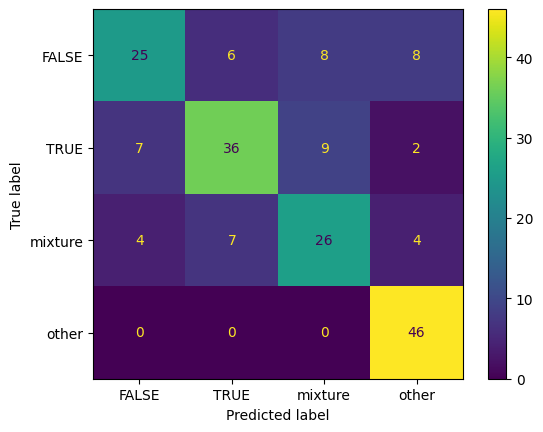

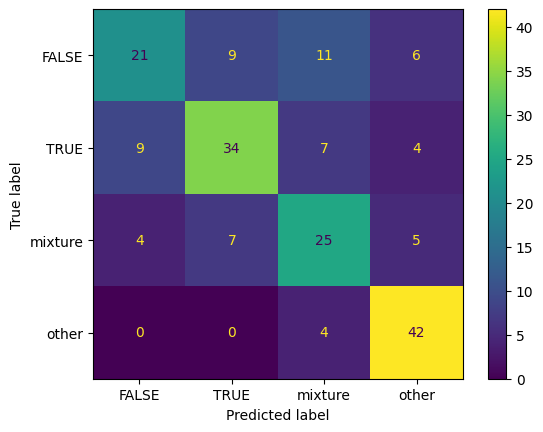

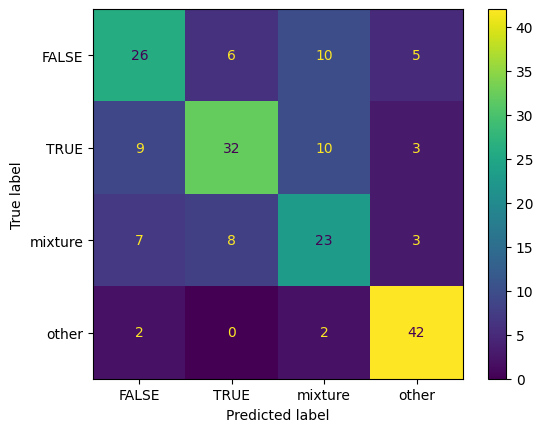

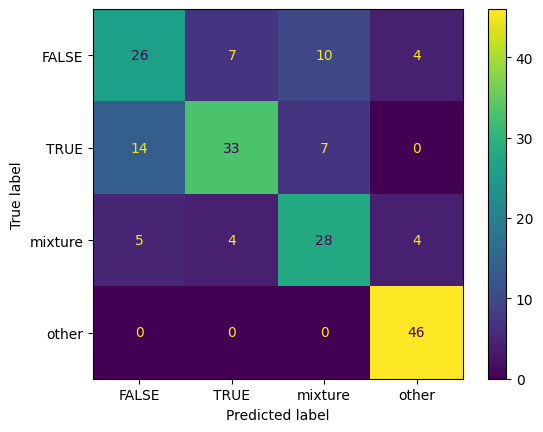

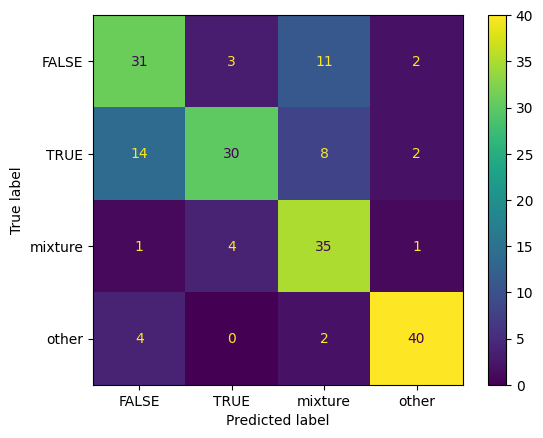

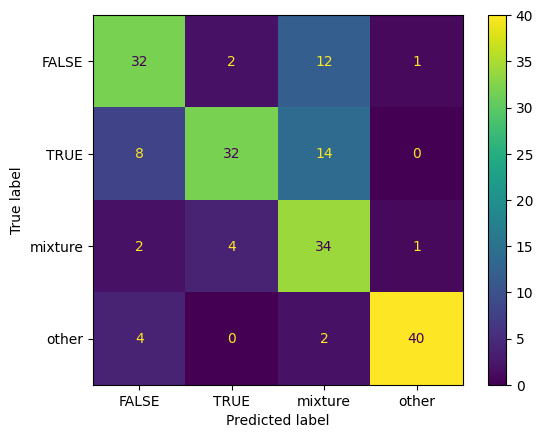

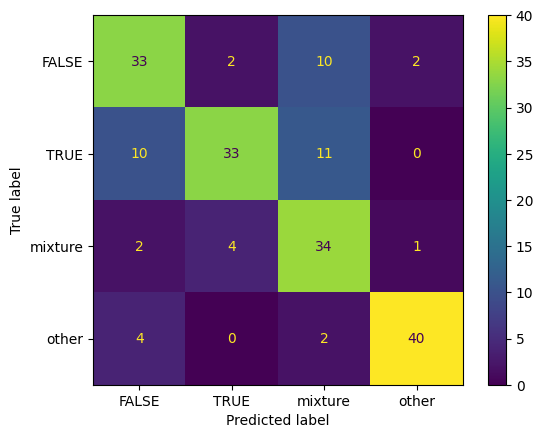

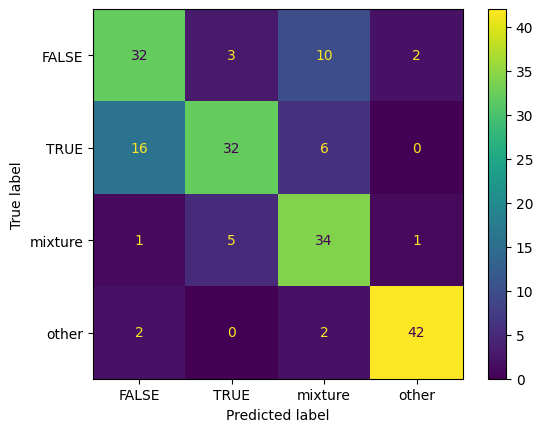

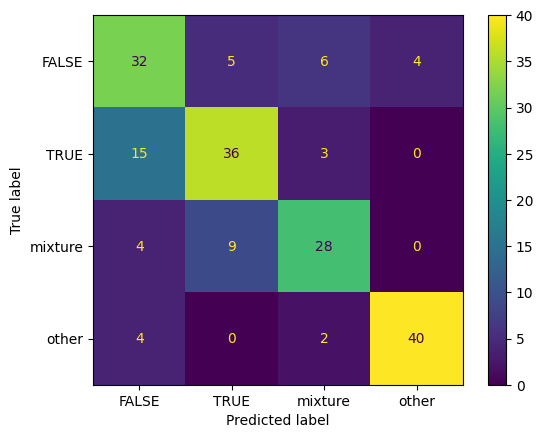

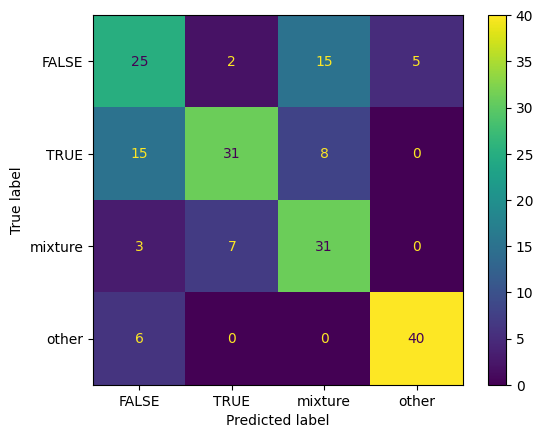

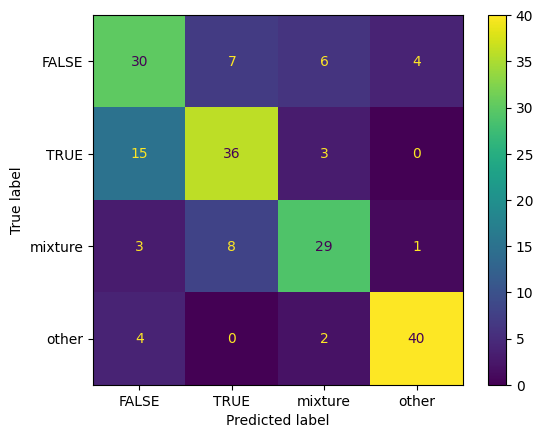

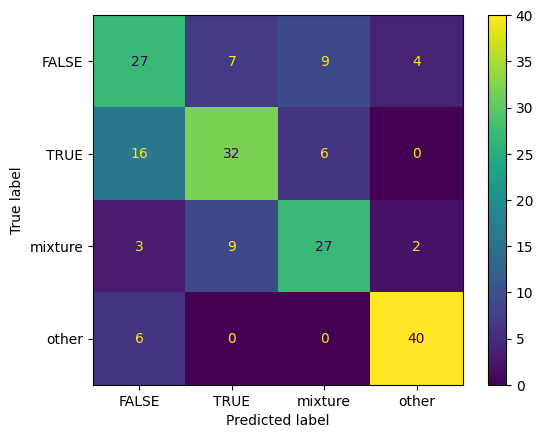

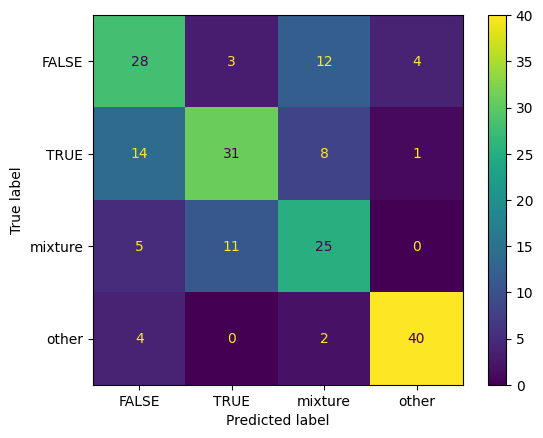

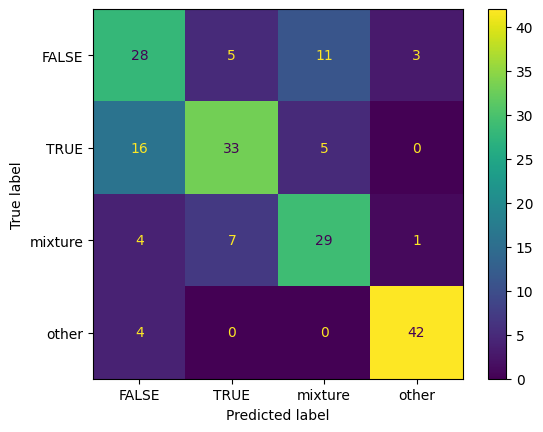

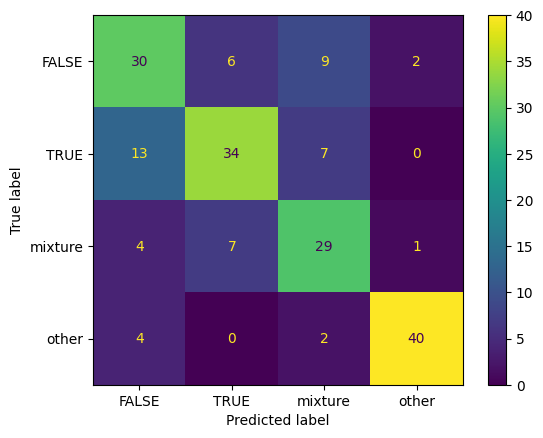

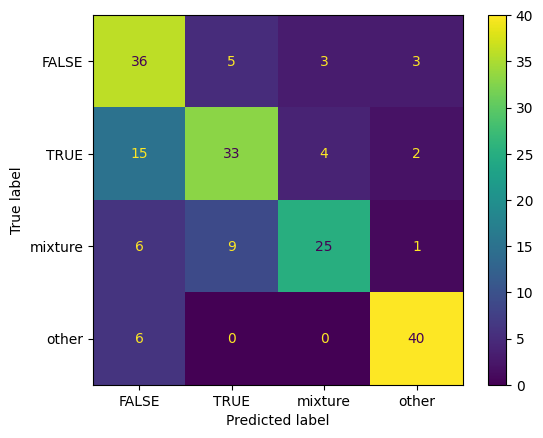

In [ ]:

np.random.seed(42)  # Set the random seed for NumPy


# le plus simple est de faire un test sur differents pipelines.  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_text_SVC = []
X_test_text_SVC = []

X_train_text_RandomForestClassifier = []
X_test_text_RandomForestClassifier = []


for name, pipeline in all_models :
    X_train_text_SVC.append(pipeline.fit_transform(X_train['text']).toarray())
    X_test_text_SVC.append(pipeline.transform(X_test['text']).toarray())
    X_train_text_RandomForestClassifier.append(pipeline.fit_transform(X_train['text']).toarray())
    X_test_text_RandomForestClassifier.append(pipeline.transform(X_test['text']).toarray())




models = {
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_text = eval('X_train_text_' + model_name)
    X_test_text = eval('X_test_text_' + model_name)
    for i in range (len(X_train_text)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      print("X_train",X_train_text[i].shape)
      print("y_train",y_train.shape)
      grid_search.fit(X_train_text[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_text[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

##**Etape 3 : Classification selon la colonne TITRE :**

**Ici, c'est une étape importante,** on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:



print("X_train", X_train.shape)
print("y_train", y_train.shape)

score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]


models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', SVC(random_state=42)))

# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))
    #pipeline.fit(X_train,y_train)
all_results=[]
scores=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    
#    print ("Evaluation de ",p)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train['title'],y_train, cv=kfold, scoring=score)
    #print("Pour le classifieur",p[0],"on a un score de",cv_results.mean(),"et un écart type de",cv_results.std())
    scores.append(cv_results)
    names.append(p[0])

    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


print("all resultats", all_results)

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)
    # affichage des résultats
#print ('\nLe meilleur resultat : ',max(results))

X_train (748, 2)
y_train (748,)
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('MultinomialNB', 0.607009009009009, 0.05808962343049095), ('LogisticRegression', 0.6323963963963964, 0.047479976685

On affiche les accuracy de chaque classifieur, on remarque la médiane (en rouge) de chaque et l'écart type aussi.

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

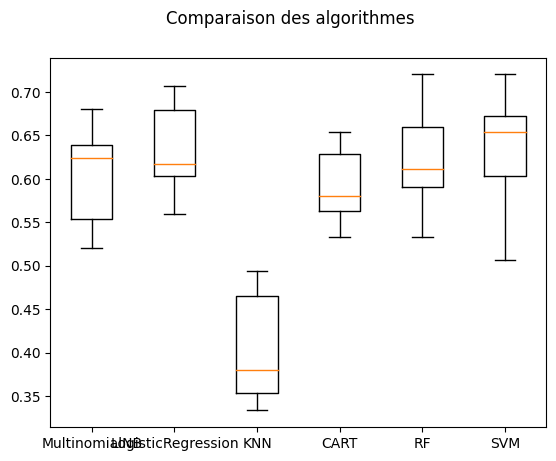

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

### Choisir les meilleurs paramètres pour SVM et RF : 


On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

y_train (748,)
y_test (188,)
X_test (188, 2)
grid search fait
X_train (748, 5045)
y_train (748,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.626 

meilleur estimateur SVC(C=5, random_state=42) 

Accuracy : 0.681
Classification Report
              precision    recall  f1-score   support

       FALSE    0.52083   0.53191   0.52632        47
        TRUE    0.80488   0.61111   0.69474        54
     mixture    0.51667   0.75610   0.61386        41
       other    1.00000   0.84783   0.91765        46

    accuracy                        0.68085       188
   macro avg    0.71059   0.68674   0.68814       188
weighted avg    0.71875   0.68085   0.68954       188

Ensemble des meilleurs paramètres :
	C: 5
	gamma: 'scale'
	kernel: 'rbf'
grid search fait
X_train (748, 4915)
y_train (748,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.631 

meilleur estimateur SVC(C=2, random_state=42) 

Accuracy : 0.676
Classification Report
 

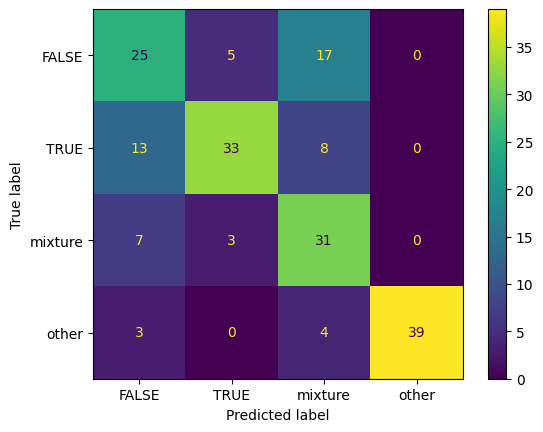

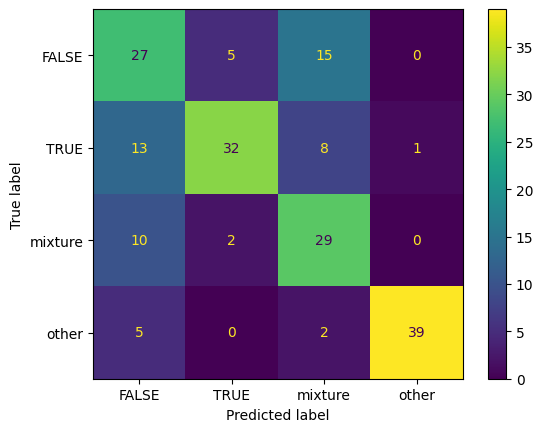

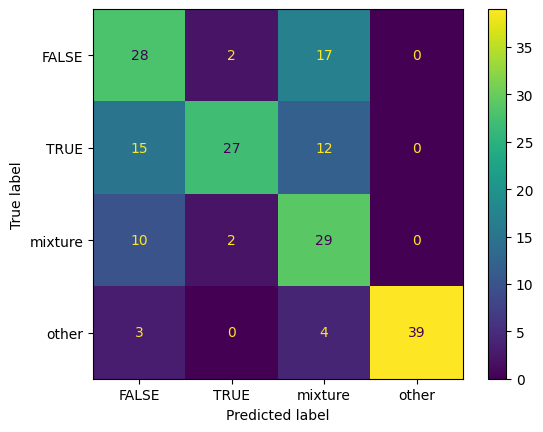

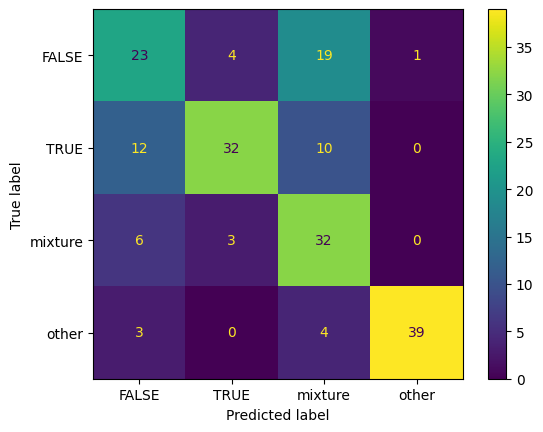

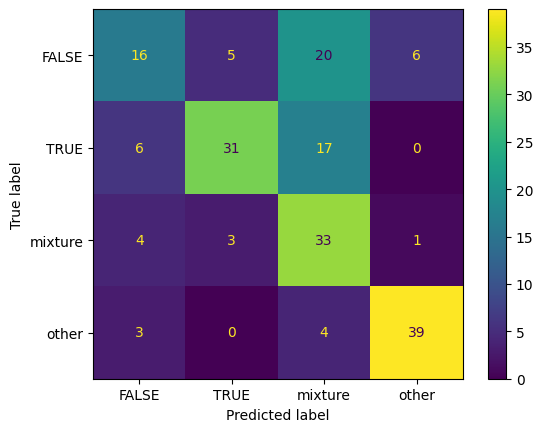

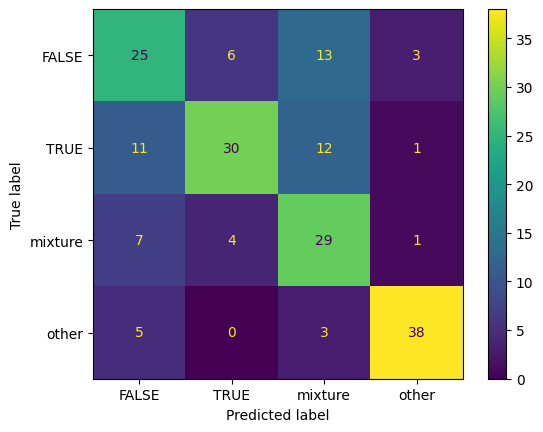

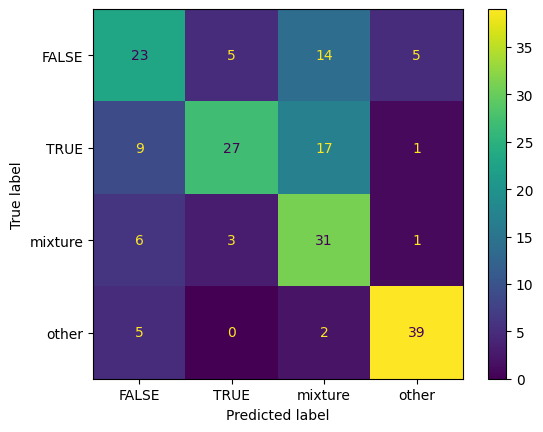

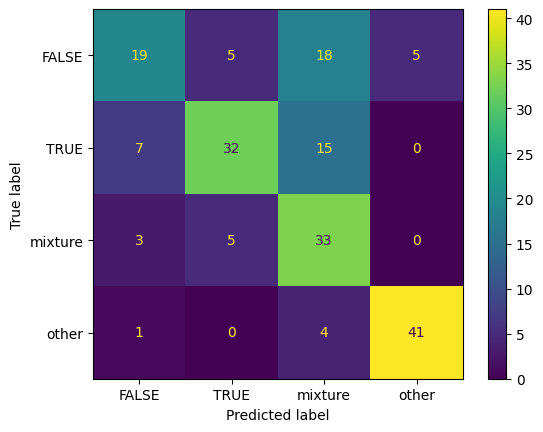

In [ ]:

np.random.seed(42)  # Set the random seed for NumPy
print("y_train", y_train.shape)
print("y_test", y_test.shape)
#X_test = np.ravel(X_test)
print("X_test", X_test.shape)
# le plus simple est de faire un test sur differents pipelines.  


# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_title_SVC = []
X_test_title_SVC = []

X_train_title_RandomForestClassifier = []
X_test_title_RandomForestClassifier = []


for name, pipeline in all_models :
    X_train_title_SVC.append(pipeline.fit_transform(X_train['title']).toarray())
    X_test_title_SVC.append(pipeline.transform(X_test['title']).toarray())
    X_train_title_RandomForestClassifier.append(pipeline.fit_transform(X_train['title']).toarray())
    X_test_title_RandomForestClassifier.append(pipeline.transform(X_test['title']).toarray())




models = {
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_title = eval('X_train_title_' + model_name)
    X_test_title = eval('X_test_title_' + model_name)
    for i in range (len(X_train_title)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      print("X_train",X_train_title[i].shape)
      print("y_train",y_train.shape)
      grid_search.fit(X_train_title[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_title[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

##**Etape 4 : Classification selon le TITRE ET TEXT ENSEMBLE (Concaténés):**

* On va à partir de X_train concaténer les 2 colonnes TEXT et TITLE en mettant un espace entre les deux 
* Vu qu'on va travailler sur la colonne text_titre qu'on vient de créer, on va séléctionner cette dernière depuis le X_train et X_test pour apprendre et tester après.

In [ ]:

#concaténation
X_train=X_train.apply(lambda row: ' '.join([str(val) for val in row]), axis=1)
X_test=X_test.apply(lambda row: ' '.join([str(val) for val in row]), axis=1)


**Ici, c'est une étape importante,** on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:


score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]


#models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', SVC(random_state=42)))

# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))

all_results=[]
scores=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    
#    print ("Evaluation de ",p)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train,y_train, cv=kfold, scoring=score)
    scores.append(cv_results)
    names.append(p[0])
    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


print("all resultats", all_results)

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)
    # affichage des résultats
#print ('\nLe meilleur resultat : ',max(results))


Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('MultinomialNB', 0.5910450450450451, 0.07300949147408688), ('LogisticRegression', 0.6724684684684684, 0.059631408484546344), ('KNN', 0.413153153153

On affiche les accuracy de chaque classifieur, on remarque la médiane (en rouge) de chaque et l'écart type aussi.

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

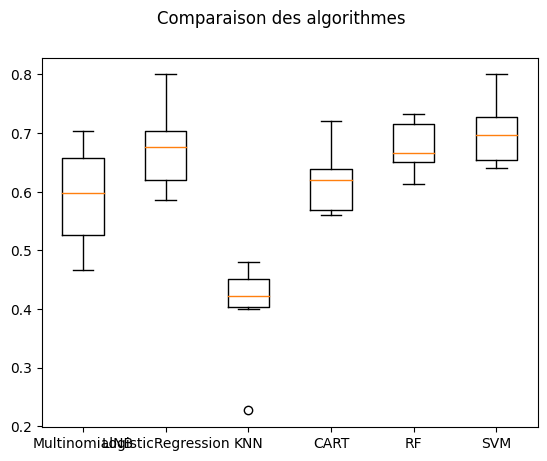

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

### Choisir les meilleurs paramètres pour SVM et RF : 


On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

grid search fait
X_train_title_text (748, 27705)
y_train (748,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.651 

meilleur estimateur SVC(kernel='linear', random_state=42) 

Accuracy : 0.676
Classification Report
              precision    recall  f1-score   support

       FALSE    0.67647   0.48936   0.56790        47
        TRUE    0.71739   0.61111   0.66000        54
     mixture    0.54348   0.60976   0.57471        41
       other    0.74194   1.00000   0.85185        46

    accuracy                        0.67553       188
   macro avg    0.66982   0.67756   0.66362       188
weighted avg    0.67524   0.67553   0.66532       188

Ensemble des meilleurs paramètres :
	C: 1.0
	gamma: 'scale'
	kernel: 'linear'
grid search fait
X_train_title_text (748, 23058)
y_train (748,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.652 

meilleur estimateur SVC(kernel='linear', random_state=42) 

Accuracy : 0.644
Classification 

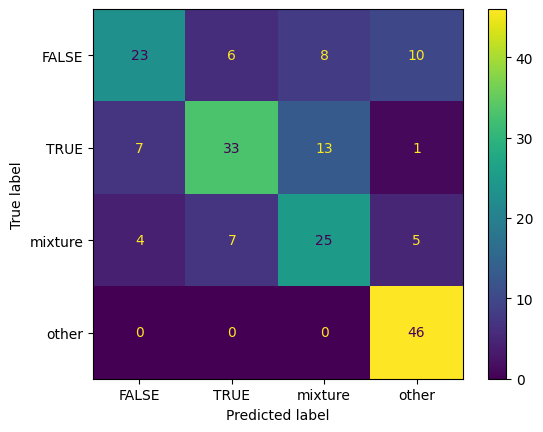

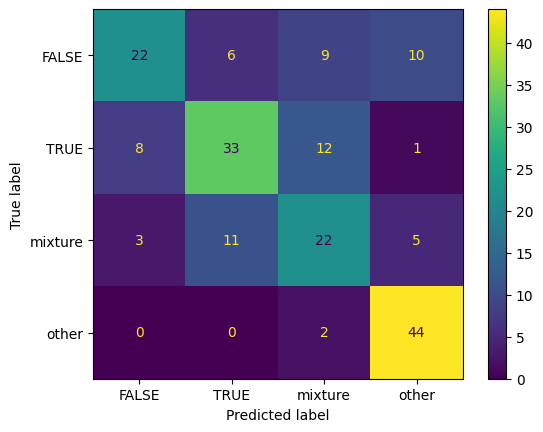

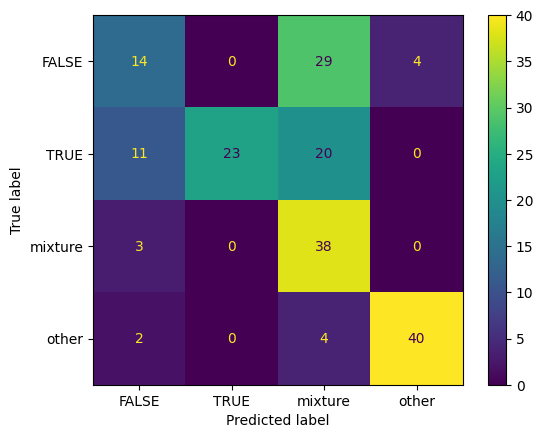

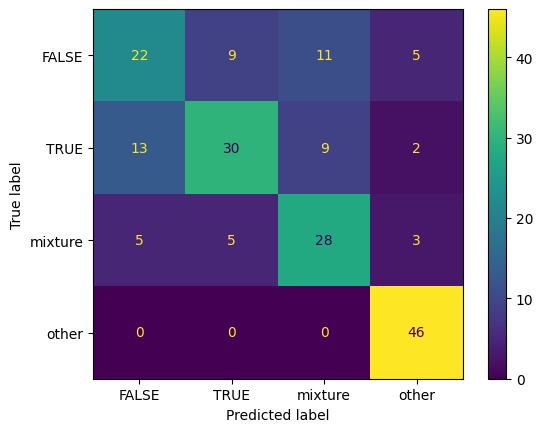

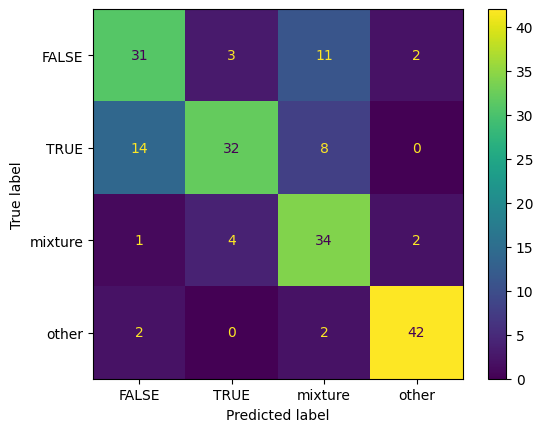

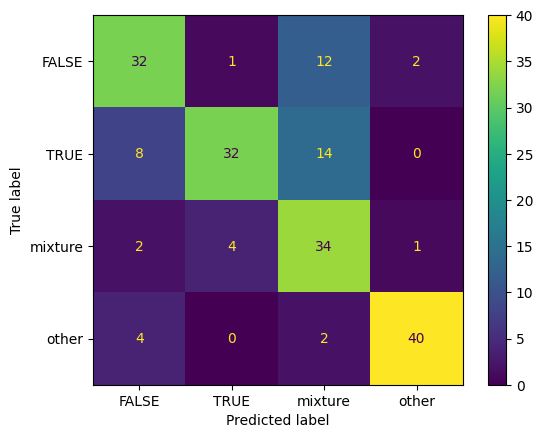

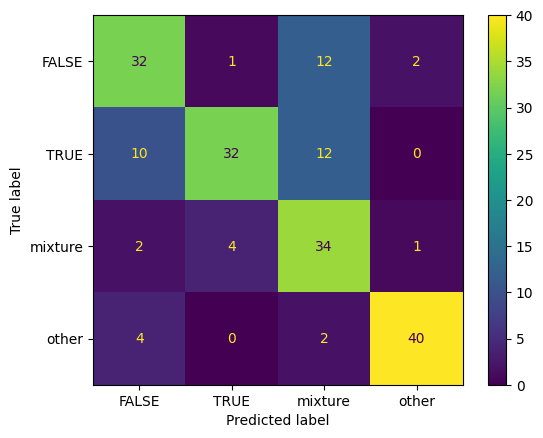

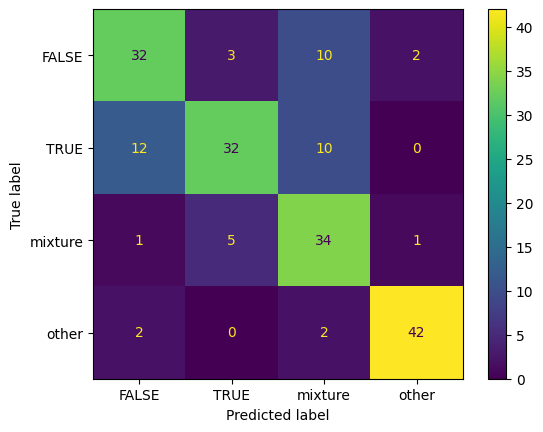

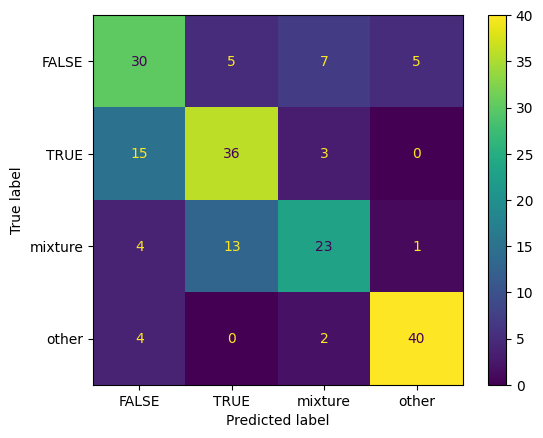

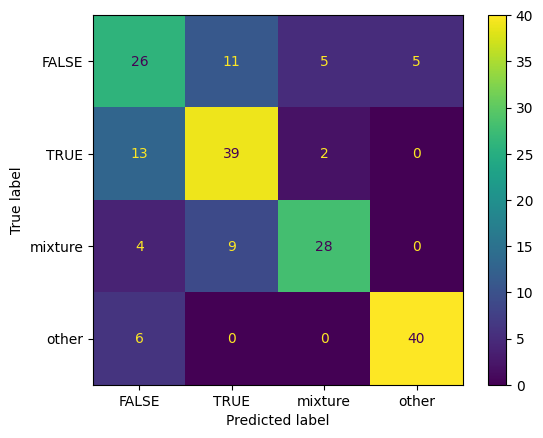

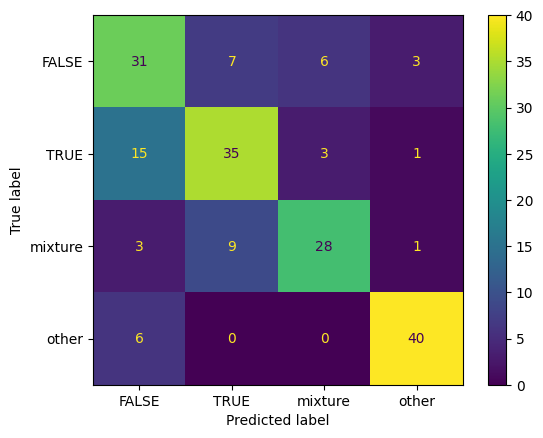

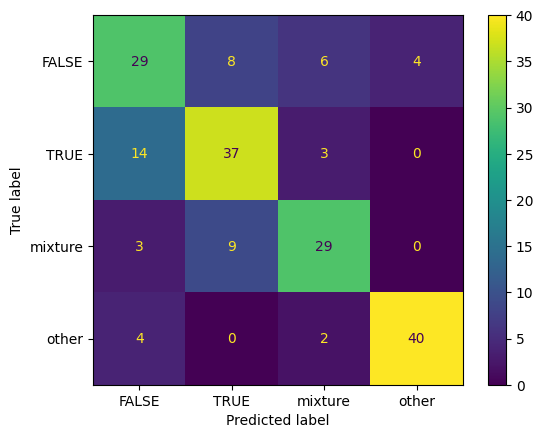

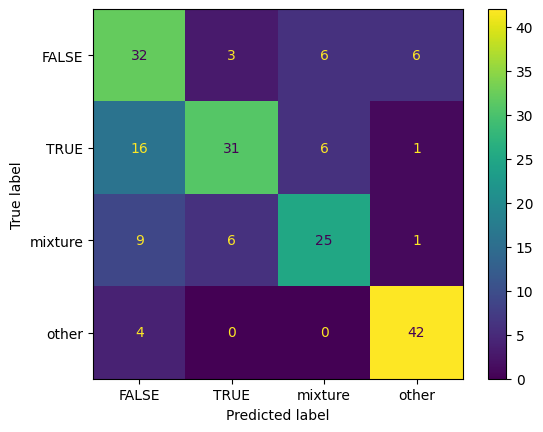

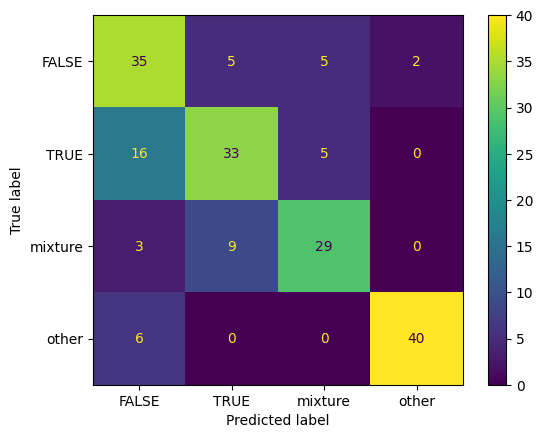

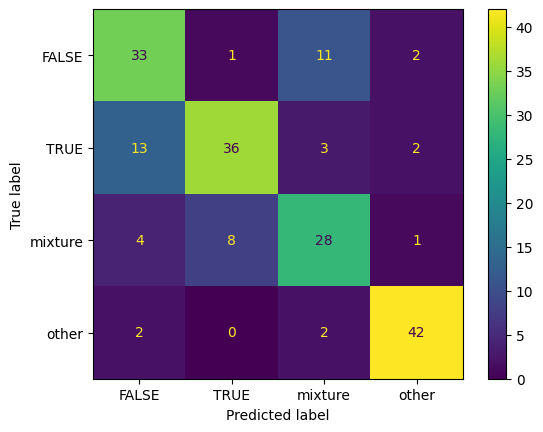

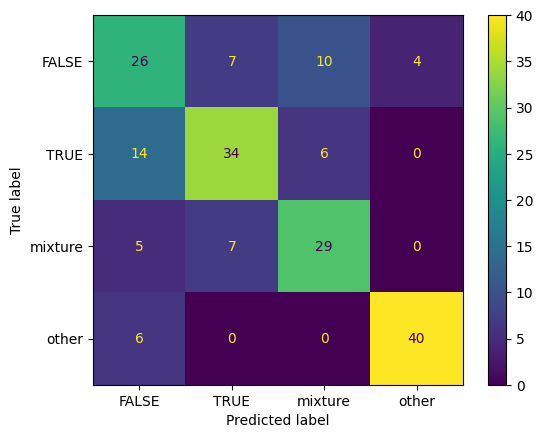

In [ ]:

  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_title_text_SVC = []
X_test_title_text_SVC = []

X_train_title_text_RandomForestClassifier = []
X_test_title_text_RandomForestClassifier = []


for name, pipeline in all_models :
    X_train_title_text_SVC.append(pipeline.fit_transform(X_train).toarray())
    X_test_title_text_SVC.append(pipeline.transform(X_test).toarray())
    X_train_title_text_RandomForestClassifier.append(pipeline.fit_transform(X_train).toarray())
    X_test_title_text_RandomForestClassifier.append(pipeline.transform(X_test).toarray())




models = {
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_title_text = eval('X_train_title_text_' + model_name)
    X_test_title_text = eval('X_test_title_text_' + model_name)
    for i in range (len(X_train_title_text)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      print("X_train_title_text",X_train_title_text[i].shape)
      print("y_train",y_train.shape)
      grid_search.fit(X_train_title_text[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_title_text[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))